In [9]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# Configuration Model Red Práctica 1

Distribución de grado de la Red Nº  34


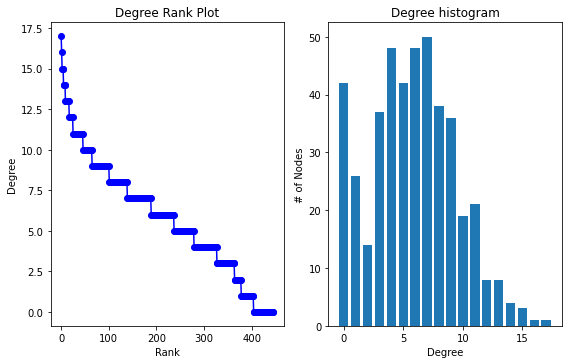

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 446.0
Número de aristas: 2.9073606478754904e+16
Camino mínimo medio: 403.8
Grado medio: 5.8
Radio medio de la red 4.8
Diámetro medio de la red 7.2
Media del coeficiente de clustering 0.016151876963272367
Coeficiente de clustering global 0.01898890330597993


In [116]:
# Red conforme a una secuencia de grados
#
# Podemos generar una red con una secuencia de grados dada
# Dicha secuencia puede seguir una determinada distribución, 
# por ejemplo, una uniforme, una normal, una ley de potencias, etc
# Sin embargo, la red resultante puede tener multi-enlaces y 
# auto-enlaces. La presencia de estos decrece si el número de nodos
# es alto con respecto al grado medio de la distribución.

import numpy as np
import random

N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=0

#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
mean = dt = vmax = vmin = []; 

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
for x in range(50):
    #La suma de todos los grados de los nodos de la red debe ser par
        while sum(grados_aleatorios) % 2 != 0:
            # Generamos una secuencia de grados aleatoria que sigue
            # una distribución normal de media 15 y desviación típica 2
            # Generamos 40 grados (nuestra red tendrá 40 nodos)
            valores_aleatorios = np.random.normal(6, 4, 445) 
            # Truncamos los valores para tener números enteros
            grados_aleatorios = valores_aleatorios.astype(int)
        
        grafo_redp1 = nx.configuration_model(grados_aleatorios)

        # Potencialmente la red puede tener múltiples enlaces (entre 
        # un mismo par de nodos). Para eliminarlos se hace lo siguiente
        grafo_redp1 = nx.Graph(grafo_redp1)

        # IDEM con los auto-enlaces (self-loops)
        grafo_redp1.remove_edges_from(nx.selfloop_edges(grafo_redp1))
        red1 = grafo_redp1
        grados = [val for (node, val) in red1.degree()]
        mean.append(np.mean(grados))
        dt.append(np.std(grados))
        vmax.append(np.amax(grados))
        vmin.append(np.amin(grados))

        N1 = N1 + red1.number_of_nodes()
        L1 += L1 + red1.number_of_edges()
        gradomedio1 += 2 * red1.number_of_edges()/ red1.number_of_nodes()
        clustering1 += nx.average_clustering(red1)
        clusterglobal1 += nx.transitivity(red1)
        #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
        conectado = nx.connected_components(red1)
        maxconectado = max(conectado, key=len) 
        caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado))))
        radio1 += nx.radius(red1.subgraph(maxconectado))
        diametro1 += nx.diameter(red1.subgraph(maxconectado))
        
        if pintar_dist == x:
            print("Distribución de grado de la Red Nº ", x)
            degree_sequence = sorted((d for n, d in red1.degree()), reverse=True)
            dmax = max(degree_sequence)

            fig = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig.add_gridspec(5, 4)

            ax1 = fig.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig.tight_layout()
            plt.show()

    
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',L1/50)
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Media del coeficiente de clustering', clustering1/50)
print('Coeficiente de clustering global', clusterglobal1/50)



# NOTA: Tanto al truncar/redondear los números de la normal, como al
# eliminar auto-enlaces y multi-enlaces alteramos ligeramente la secuencia
# pudiendo hacer que no se pueda ajustar a ella la distribución de origen 

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 105, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 24

In [61]:
# Donde N es el número de nodos de la red
nodos1 = 1500;
nodos2 = 445;
prob1 = 5.996/nodos1;
prob2 = 5.996/nodos2;

In [ ]:
# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=0
N2=L2=gradomedio2=caminocorto2=radio2=diametro2=clustering2=clusterglobal2=0
#Variable con el número de nodos deseado para cada red
nodos1=1500
nodos2=445
for x in range(50):
    red1 = nx.erdos_renyi_graph(nodos1, prob1)
    red2 = nx.erdos_renyi_graph(nodos2, prob2)
    
    N1 = N1 + red1.number_of_nodes()
    L1 += L1 + red1.number_of_edges()
    gradomedio1 += 2 * L1 / N1
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    N2 = N2 + red2.number_of_nodes()
    L2 += L2 + red2.number_of_edges()
    gradomedio2 += 2 * red2.number_of_edges() / red2.number_of_nodes()
    clustering2 += nx.average_clustering(red2)
    clusterglobal2 += nx.transitivity(red2)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado2 = nx.connected_components(red2)
    maxconectado2 = max(conectado2, key=len) 
    caminocorto2 += len(list(nx.shortest_path(red2.subgraph(maxconectado2))))
    radio2 += nx.radius(red2.subgraph(maxconectado2))
    diametro2 += nx.diameter(red2.subgraph(maxconectado2))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)
            degree_sequence2 = sorted((d for n, d in red2.degree()), reverse=True)
            dmax2 = max(degree_sequence2)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            fig1 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
            degree_sequence = sorted((d for n, d in red1.degree()), reverse=True)
            dmax = max(degree_sequence)

            fig2 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig2.add_gridspec(5, 4)

            ax1 = fig2.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig2.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig.tight_layout()
            plt.show()
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',L1/50)
print('Camino mínimo medio:',caminocorto1/50 )
print('Grado medio:',gradomedio1/50)
print('Radio de la red', radio1/50)
print('Diámetro de la red', diametro1/50)
print('Media del coeficiente de clustering', clustering1/50)
print('Coeficiente de clustering global', clusterglobal1/50)
print('RED 2 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',L1/50)
print('Camino mínimo medio:',caminocorto1/50 )
print('Grado medio:',gradomedio1/50)
print('Radio de la red', radio1/50)
print('Diámetro de la red', diametro1/50)
print('Media del coeficiente de clustering', clustering1/50)
print('Coeficiente de clustering global', clusterglobal1/50)



# Comparación con el Modelo Watts-Strogatz

In [ ]:
# Modelo de red aleatoria de Watts-Strogatz, que es una evolución de Erdos-Renyi
# Tiene como parámetros principales:
#     - El número de nodos, 
#     - Los k vecinos adyacentes más cercanos a los que se conecta, y
#     - La probabilidad p de cambiar un enlace a un vecino por otro nodo cualquiera 
# Cuanto mayor es la probabilidad p más se para favorece el mundo pequeño, a la vez que el conectarse a los
# vecinos favorece el coeficiente de clustering (la existencia de triángulos en el vecindario) 
#
# Más info en: http://snap.stanford.edu/class/cs224w-readings/watts98smallworld.pdf

num_nodos = 40
vecinos_adyacentes = 2 # Si es impar coge vecinos-1
probabilidad = 0.1

plt.figure()
grafo_ws = nx.watts_strogatz_graph(num_nodos, vecinos_adyacentes, probabilidad)
nx.draw_circular(grafo_ws)
plt.title('Probabilidad = ' + str(probabilidad))
plt.show()